## CODE TO DETECT LANE LINES IN AN IMAGE

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg

## READ AND SHOW THE IMAGE

(540, 956, 3)

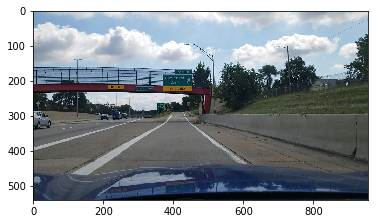

In [2]:
image_c = mpimg.imread('new_test_image_3.jpg')
plt.imshow(image_c)  
image_c.shape


## CONVERT TO GRAY SCALE 

(540, 956)

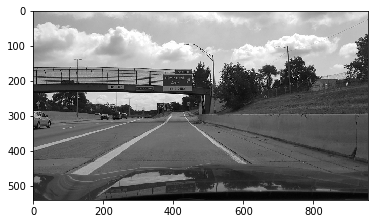

In [3]:
image_g = cv2.cvtColor(image_c, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = 'gray')  
image_g.shape

## GAUSSIAN BLURRING AND CANNY 

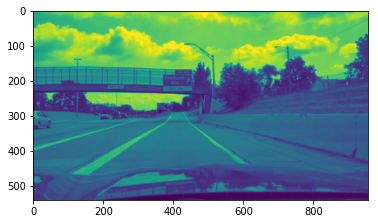

In [4]:
image_blurred = cv2.GaussianBlur(image_g, (7, 7), 0)
plt.imshow(image_blurred)  


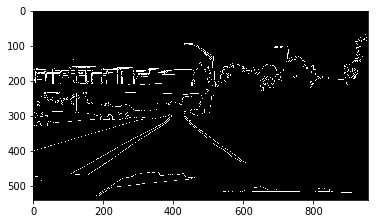

In [5]:
threshold_low = 10
threshold_high = 200

image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap = 'gray')  


## DEFINE THE REGION OF INTEREST 

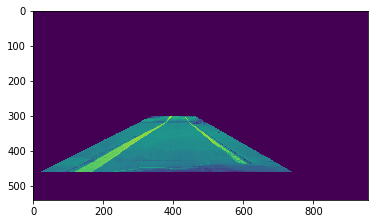

In [6]:
# Visualize the region of interest
vertices = np.array([[(20,460),(340, 300), (460, 300), (740,460)]], dtype=np.int32)    
mask = np.zeros_like(image_g)   
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

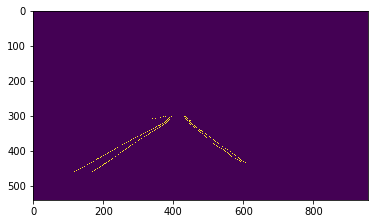

In [7]:
kernel = np.ones((2,2), np.uint8)
masked_image = cv2.bitwise_and(image_canny, mask)
dilated_canny = cv2.dilate(image_canny, kernel, iterations=3) 
masked_image2 = cv2.bitwise_and(dilated_canny, mask)

plt.figure()
plt.imshow(masked_image)

## HOUGH LINES DETECTION AND DRAW FUNCTION 

In [8]:
rho = 2            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 40     # minimum number of votes 
min_line_len = 100  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments    
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines 

array([[[120, 459, 263, 377]],

       [[168, 460, 389, 311]],

       [[419, 301, 607, 433]],

       [[255, 382, 382, 317]],

       [[118, 460, 226, 400]],

       [[116, 460, 311, 352]]], dtype=int32)

In [9]:
a = 1
b = 1
g = 0 


# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image_c, a, line_image, b, g)


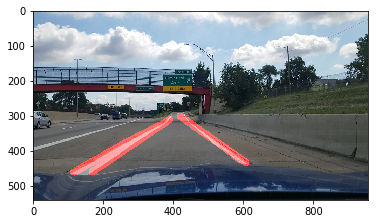

In [10]:
plt.figure()
plt.imshow(Image_with_lines)

# Great Job!